# LCA Campaign Data Extraction

## Parameters

In [1]:
start = '2020-02-10'
stop = '2020-03-17'
bkp = True
path = 'C:/Users/cganty/Documents/src/GitHub/XL-AIR/LCA/data' #File where data must be saved

## Import

In [2]:
import io
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry
import pandas as pd
%matplotlib inline

## Meta Extraction

In [3]:
# Better not to use an external file to reduce the number of sources to update
# meta = pd.read_csv('./data/metadata_LCA.csv')

In [4]:
mstr = """detector_id,sensor_id,location_name,location_key,sensor_type
2144154,40262,Ecole Sainte-Trinité - capteur 1,EST-1,sds011
5107590,40260,Home Les Heures Douces - capteur 1,HHD-1,sds011
2144144,40258,Home Jean Van Aa - capteur 1,HVA-1,sds011
14544939,40096,Home Jean Van Aa - capteur 2,HVA-2,sds011
2129824,39672,Crèche Le Berceau - capteur 1,CLB-1,sds011
5110852,40092,Crèche Le Berceau - capteur 2,CLB-2,sds011
2129577,42138,Ecole européenne Bruxelles III - capteur 1,EEB3-1,sds011
2108900,41107,Ecole européenne Bruxelles III - capteur 2,EEB3-2,sds011
5109108,41211,Ecole n°7 - capteur 1,E7-1,sds011
5110614,41213,Ecole n°7 - capteur 2,E7-2,sds011
2129507,41207,Ecole n°8 - capteur 1,E8-1,sds011
5110442,41209,Ecole n°8 - capteur 2,E8-2,sds011

2144154,40263,Ecole Sainte-Trinité - capteur 1,EST-1,dht22
5107590,40261,Home Les Heures Douces - capteur 1,HHD-1,dht22
2144144,40259,Home Jean Van Aa - capteur 1,HVA-1,dht22
14544939,40097,Home Jean Van Aa - capteur 2,HVA-2,dht22
2129824,39673,Crèche Le Berceau - capteur 1,CLB-1,dht22
5110852,40093,Crèche Le Berceau - capteur 2,CLB-2,dht22
2129577,42139,Ecole européenne Bruxelles III - capteur 1,EEB3-1,dht22
2108900,41108,Ecole européenne Bruxelles III - capteur 2,EEB3-2,dht22
5109108,41212,Ecole n°7 - capteur 1,E7-1,dht22
5110614,41214,Ecole n°7 - capteur 2,E7-2,dht22
2129507,41208,Ecole n°8 - capteur 1,E8-1,dht22
5110442,41210,Ecole n°8 - capteur 2,E8-2,dht22"""

# 2129577,21944,Ecole européenne Bruxelles III - capteur 1,EEB3-1,dht22
# 2108900,21371,Ecole européenne Bruxelles III - capteur 2,EEB3-2,
# 5109108,21431,Ecole n°7 - capteur 1,E7-1,bme280
# 5110614,21432,Ecole n°7 - capteur 2,E7-2,
# 2129507,21429,Ecole n°8 - capteur 1,E8-1,dht22
# 5110442,21430,Ecole n°8 - capteur 2,E8-2,sds011"""

In [5]:
meta = pd.read_csv(io.StringIO(mstr))
meta

,detector_id,sensor_id,location_name,location_key,sensor_type
0,2144154,40262,Ecole Sainte-Trinité - capteur 1,EST-1,sds011
1,5107590,40260,Home Les Heures Douces - capteur 1,HHD-1,sds011
2,2144144,40258,Home Jean Van Aa - capteur 1,HVA-1,sds011
3,14544939,40096,Home Jean Van Aa - capteur 2,HVA-2,sds011
4,2129824,39672,Crèche Le Berceau - capteur 1,CLB-1,sds011
5,5110852,40092,Crèche Le Berceau - capteur 2,CLB-2,sds011
6,2129577,42138,Ecole européenne Bruxelles III - capteur 1,EEB3-1,sds011
7,2108900,41107,Ecole européenne Bruxelles III - capteur 2,EEB3-2,sds011
8,5109108,41211,Ecole n°7 - capteur 1,E7-1,sds011
9,5110614,41213,Ecole n°7 - capteur 2,E7-2,sds011


## Fetch Method

In [6]:
def fetch(meta, trange=None, show=False, backup=False,
          meta_columns=['detector_id', 'sensor_id', 'location_key'], session=requests,
    url="https://archive.luftdaten.info/{date:%Y-%m-%d}/{date:%Y-%m-%d}_{sensor_type:}_sensor_{sensor_id:}.csv"):
    """
    Fetch Sensor Data from LuftDaten Project
    """
    # Default Time Range (last 7 days):
    if trange is None:
        trange = pd.date_range(end=pd.Timestamp.utcnow().floor('D'), freq='D', periods=7)
    # Data Processing:
    maj = []
    for m in meta.to_dict(orient='records'):
        dfs = []
        for t in trange:
            target = url.format(date=t, **m)
            rep = session.get(target, headers={'User-Agent': 'Mozilla/5.0'}, timeout=60)
            if show:
                print(rep, target)
            if (rep.status_code == 200) and (rep.headers['Content-Type'] == 'text/csv'):
                df = pd.read_csv(io.BytesIO(rep.content), sep=';', parse_dates=['timestamp'])
                dfs.append(df)
        if dfs:
            df = pd.concat(dfs, axis=0)
            maj.append(df)
    df = pd.concat(maj, axis=0, sort=False).dropna(how='all', axis=1)
    df = df.merge(meta.loc[:,meta_columns], on='sensor_id')
    # Melt, aggregate and pivot:
    df = df.melt(id_vars=['sensor_id', 'location_key', 'timestamp'],
              value_vars=['P1', 'P2', 'temperature', 'humidity', 'lat', 'lon'])
    df['timestamp'] = df['timestamp'].dt.floor('1H')
    df = df.pivot_table(index='timestamp', columns=['variable', 'location_key'], values='value')
    return df

## Data

In [7]:
dt = pd.date_range(start, stop, freq='D')
df = fetch(meta, trange=dt, show=True)

<Response [200]> https://archive.luftdaten.info/2020-02-10/2020-02-10_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-11/2020-02-11_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-12/2020-02-12_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-13/2020-02-13_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-14/2020-02-14_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-15/2020-02-15_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-16/2020-02-16_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-17/2020-02-17_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-18/2020-02-18_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-19/2020-02-19_sds011_sensor_40262.csv
<Response [200]> https://archive.luftdaten.info/2020-02-20/2

<Response [200]> https://archive.luftdaten.info/2020-02-24/2020-02-24_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-02-25/2020-02-25_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-02-26/2020-02-26_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-02-27/2020-02-27_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-02-28/2020-02-28_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-02-29/2020-02-29_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-03-01/2020-03-01_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-03-02/2020-03-02_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-03-03/2020-03-03_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-03-04/2020-03-04_sds011_sensor_40258.csv
<Response [200]> https://archive.luftdaten.info/2020-03-05/2

<Response [200]> https://archive.luftdaten.info/2020-03-09/2020-03-09_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-10/2020-03-10_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-11/2020-03-11_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-12/2020-03-12_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-13/2020-03-13_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-14/2020-03-14_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-15/2020-03-15_sds011_sensor_39672.csv
<Response [200]> https://archive.luftdaten.info/2020-03-16/2020-03-16_sds011_sensor_39672.csv
<Response [404]> https://archive.luftdaten.info/2020-03-17/2020-03-17_sds011_sensor_39672.csv
<Response [404]> https://archive.luftdaten.info/2020-02-10/2020-02-10_sds011_sensor_40092.csv
<Response [404]> https://archive.luftdaten.info/2020-02-11/2

<Response [200]> https://archive.luftdaten.info/2020-02-16/2020-02-16_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-17/2020-02-17_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-18/2020-02-18_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-19/2020-02-19_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-20/2020-02-20_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-21/2020-02-21_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-22/2020-02-22_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-23/2020-02-23_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-24/2020-02-24_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-25/2020-02-25_sds011_sensor_41107.csv
<Response [200]> https://archive.luftdaten.info/2020-02-26/2

<Response [200]> https://archive.luftdaten.info/2020-03-01/2020-03-01_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-02/2020-03-02_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-03/2020-03-03_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-04/2020-03-04_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-05/2020-03-05_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-06/2020-03-06_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-07/2020-03-07_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-08/2020-03-08_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-09/2020-03-09_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-10/2020-03-10_sds011_sensor_41213.csv
<Response [200]> https://archive.luftdaten.info/2020-03-11/2

<Response [200]> https://archive.luftdaten.info/2020-03-16/2020-03-16_sds011_sensor_41209.csv
<Response [404]> https://archive.luftdaten.info/2020-03-17/2020-03-17_sds011_sensor_41209.csv
<Response [200]> https://archive.luftdaten.info/2020-02-10/2020-02-10_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-11/2020-02-11_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-12/2020-02-12_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-13/2020-02-13_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-14/2020-02-14_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-15/2020-02-15_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-16/2020-02-16_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-17/2020-02-17_dht22_sensor_40263.csv
<Response [200]> https://archive.luftdaten.info/2020-02-18/2020-02-1

<Response [404]> https://archive.luftdaten.info/2020-02-23/2020-02-23_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-02-24/2020-02-24_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-02-25/2020-02-25_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-02-26/2020-02-26_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-02-27/2020-02-27_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-02-28/2020-02-28_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-02-29/2020-02-29_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-03-01/2020-03-01_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-03-02/2020-03-02_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-03-03/2020-03-03_dht22_sensor_40259.csv
<Response [200]> https://archive.luftdaten.info/2020-03-04/2020-03-04_

<Response [200]> https://archive.luftdaten.info/2020-03-09/2020-03-09_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-10/2020-03-10_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-11/2020-03-11_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-12/2020-03-12_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-13/2020-03-13_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-14/2020-03-14_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-15/2020-03-15_dht22_sensor_39673.csv
<Response [200]> https://archive.luftdaten.info/2020-03-16/2020-03-16_dht22_sensor_39673.csv
<Response [404]> https://archive.luftdaten.info/2020-03-17/2020-03-17_dht22_sensor_39673.csv
<Response [404]> https://archive.luftdaten.info/2020-02-10/2020-02-10_dht22_sensor_40093.csv
<Response [404]> https://archive.luftdaten.info/2020-02-11/2020-02-11_

<Response [200]> https://archive.luftdaten.info/2020-02-17/2020-02-17_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-18/2020-02-18_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-19/2020-02-19_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-20/2020-02-20_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-21/2020-02-21_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-22/2020-02-22_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-23/2020-02-23_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-24/2020-02-24_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-25/2020-02-25_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-26/2020-02-26_dht22_sensor_41108.csv
<Response [200]> https://archive.luftdaten.info/2020-02-27/2020-02-27_

<Response [200]> https://archive.luftdaten.info/2020-03-03/2020-03-03_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-04/2020-03-04_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-05/2020-03-05_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-06/2020-03-06_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-07/2020-03-07_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-08/2020-03-08_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-09/2020-03-09_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-10/2020-03-10_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-11/2020-03-11_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-12/2020-03-12_dht22_sensor_41214.csv
<Response [200]> https://archive.luftdaten.info/2020-03-13/2020-03-13_

In [9]:
df.to_csv("lca.csv")

In [10]:
df.tail()

variable                    P1                                              \
location_key             CLB-1      CLB-2       E7-1       E7-2       E8-1   
timestamp                                                                    
2020-03-16 19:00:00  31.680909  20.002308  21.934545  23.434800  20.095833   
2020-03-16 20:00:00  27.419500  16.599091  22.248000  23.253333  19.594667   
2020-03-16 21:00:00  25.102917  16.220000  24.560000  24.018400  17.639231   
2020-03-16 22:00:00  27.981667  19.244167  27.592222  24.325200  18.407273   
2020-03-16 23:00:00  22.380526  15.399000  21.563750  21.244583  17.448571   

variable                                                                    \
location_key              E8-2     EEB3-1     EEB3-2      EST-1      HHD-1   
timestamp                                                                    
2020-03-16 19:00:00  19.547500  15.789583  16.712800  19.804167  14.434400   
2020-03-16 20:00:00  20.449000  17.507600  15.585833  20.756400  13.700800   
2020-03-16 21:00:00  19.141667  16.520870  17.695000  20.832917  12.767083   
2020-03-16 22:00:00  18.200000  17.983750  18.749167  20.796800  12.735200   
2020-03-16 23:00:00  16.444615  14.730435  15.574583  17.108333  11.464167   

variable             ... temperature                                   \
location_key         ...        E7-1       E7-2       E8-1       E8-2   
timestamp            ...                                                
2020-03-16 19:00:00  ...   13.681818  13.940000  15.966667  17.550000   
2020-03-16 20:00:00  ...   13.650000  13.900000  16.013333  17.700000   
2020-03-16 21:00:00  ...   13.750000  14.032000  15.746154  17.308333   
2020-03-16 22:00:00  ...   13.522222  13.796000  15.245455  16.866667   
2020-03-16 23:00:00  ...   12.900000  13.191667  14.723077  16.446154   

variable                                                                    \
location_key            EEB3-1     EEB3-2      EST-1      HHD-1      HVA-1   
timestamp                                                                    
2020-03-16 19:00:00  12.375000  13.356000  14.870833  11.656000  13.266667   
2020-03-16 20:00:00  12.580000  13.387500  14.652000  12.096000  13.384000   
2020-03-16 21:00:00  12.333333  13.166667  14.425000  11.179167  12.737500   
2020-03-16 22:00:00  12.004348  12.800000  14.068000  10.416000  11.966667   
2020-03-16 23:00:00  11.437500  12.245455  13.429167  10.416667  12.000000   

variable                        
location_key             HVA-2  
timestamp                       
2020-03-16 19:00:00  13.504167  
2020-03-16 20:00:00  13.585000  
2020-03-16 21:00:00  13.140000  
2020-03-16 22:00:00  12.417391  
2020-03-16 23:00:00  12.240000  

[5 rows x 72 columns]

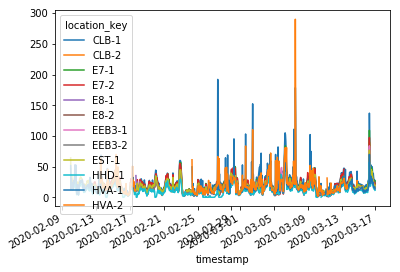

In [11]:
df['P1'].plot()

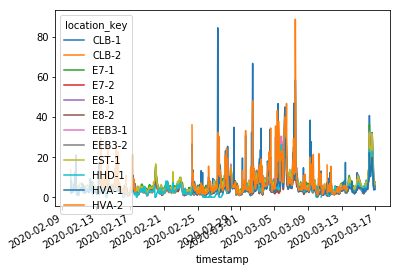

In [12]:
df['P2'].plot()

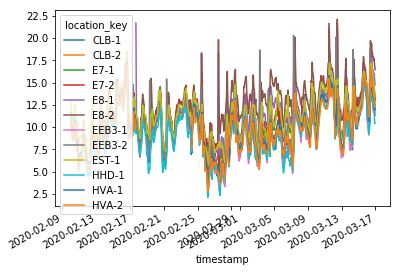

In [13]:
df['temperature'].plot()

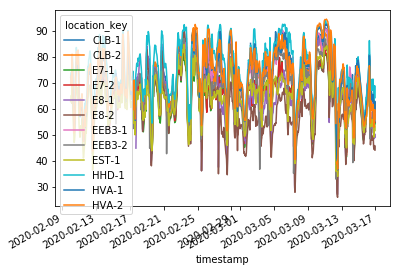

In [14]:
df['humidity'].plot()